# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
labels_csv = pd.read_csv('signnames.csv', delimiter=',')
print(labels_csv.head())
#n_class = len(set(labels_csv['ClassId']))
n_classes = labels_csv.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy as np
import random

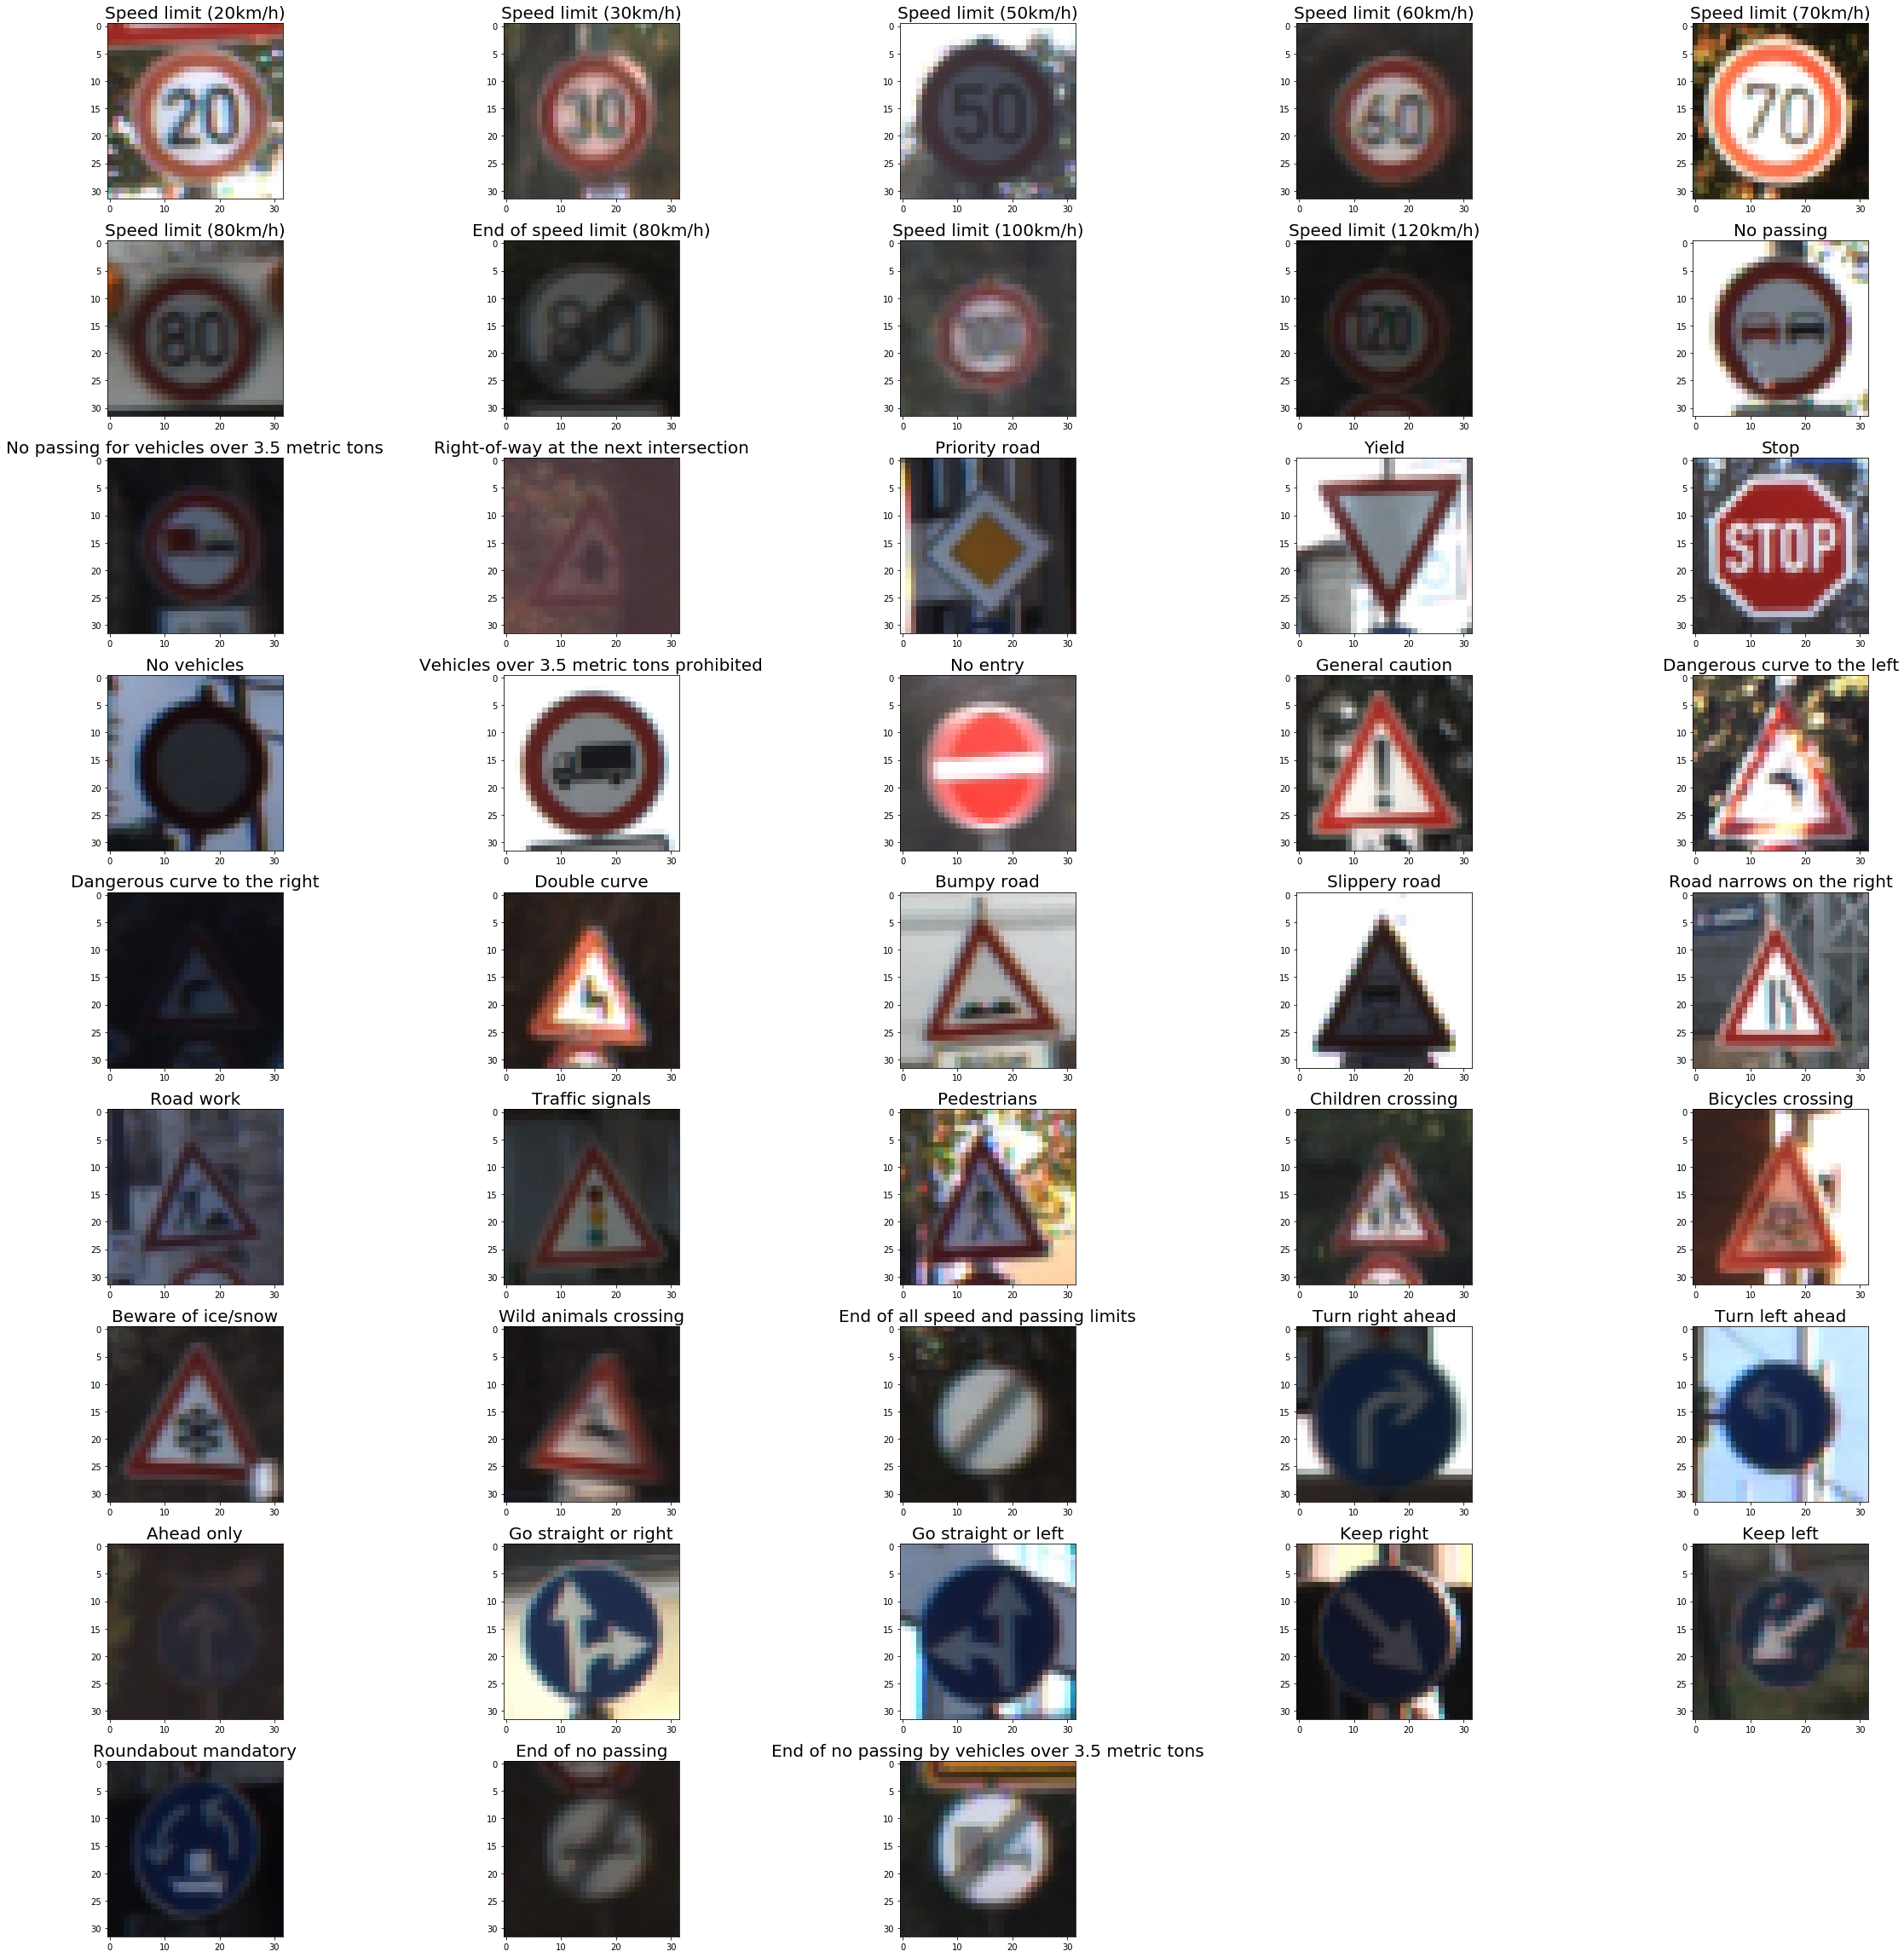

In [4]:
### Visualizing images randomly for each class Sign.

fig = plt.figure(figsize=(32, 32))#Set the figure to put the labels

for label in range(n_classes):
    imgs_selected_label = X_train[y_train == label] #Choose the specifitical label of images
    img = random.choice(imgs_selected_label) #Radom choosing one the specifitial sign of images
    ax = fig.add_subplot(int(n_classes/5)+1,5,label+1) #Set the subplot
    ax.imshow(img)#Show the images one by one
    ax.set_title(labels_csv.iloc[label][1], fontsize=20)#Set title of the label of image

# Show all the images in the figure    
plt.tight_layout()
plt.show()

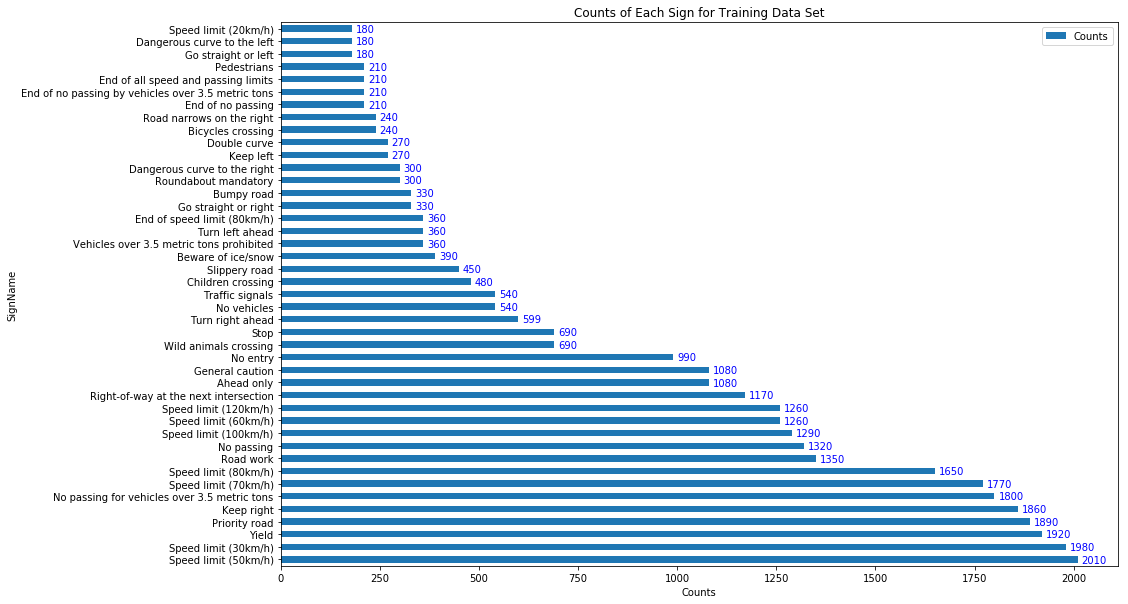

In [5]:
### Plotting the count of each sign for Training data Set

new_labels_df = pd.DataFrame()# Set a new DataFrame to store y_train
new_labels_df['ClassId'] = y_train# Putting the y_train to the DataFrame 
new_label = labels_csv.copy()# Copy mapping DataFrame to a new DataFrame in order to not to modify the original data
labels_count = new_labels_df['ClassId'].value_counts()# Count numbers values of each sign
new_label['Counts'] = labels_count# Add a new column to the new DataFrame which has the y_train data
new_label.sort_values(by='Counts', ascending=False, inplace=True)# Sorting the new DataFrame by counts of each sign 

ax = new_label.plot(x='SignName', y='Counts', kind='barh',  figsize = (15,10), title='Counts of Each Sign for Training Data Set')#Plotting data by barh
ax.set_ylabel('SignName')
ax.set_xlabel('Counts')

# Add number text to each counts of the sign
for i, v in enumerate( new_labels_df['ClassId'].value_counts()):
    ax.text(v + 10, i - 0.25, str(v), color='blue')
plt.show()

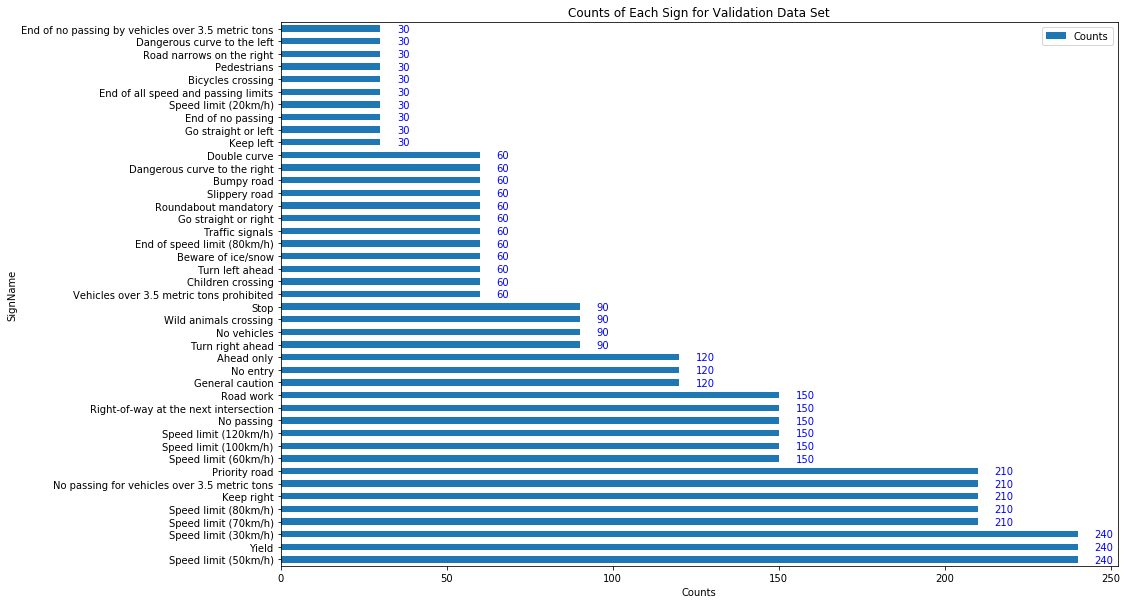

In [6]:
### Plotting the count of each sign for Validation Data Set

new_labels_df = pd.DataFrame()# Set a new DataFrame to store y_train
new_labels_df['ClassId'] = y_valid# Putting the y_train to the DataFrame 
new_label = labels_csv.copy()# Copy mapping DataFrame to a new DataFrame in order to not to modify the original data
labels_count = new_labels_df['ClassId'].value_counts()# Count numbers values of each sign
new_label['Counts'] = labels_count# Add a new column to the new DataFrame which has the y_train data
new_label.sort_values(by='Counts', ascending=False, inplace=True)# Sorting the new DataFrame by counts of each sign 

ax = new_label.plot(x='SignName', y='Counts', kind='barh',  figsize = (15,10), title='Counts of Each Sign for Validation Data Set')#Plotting data by barh
ax.set_ylabel('SignName')
ax.set_xlabel('Counts')

# Add number text to each counts of the sign
for i, v in enumerate( new_labels_df['ClassId'].value_counts()):
    ax.text(v + 5, i - 0.25, str(v), color='blue')
plt.show()

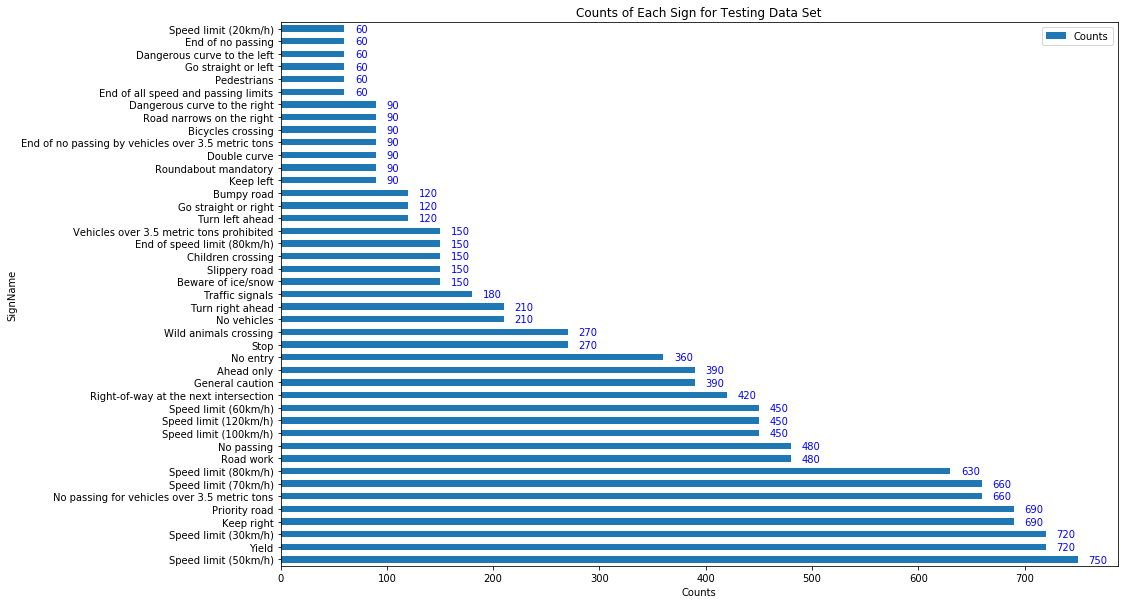

In [7]:
### Plotting the count of each sign for Test Data Set

new_labels_df = pd.DataFrame()# Set a new DataFrame to store y_train
new_labels_df['ClassId'] = y_test# Putting the y_train to the DataFrame 
new_label = labels_csv.copy()# Copy mapping DataFrame to a new DataFrame in order to not to modify the original data
labels_count = new_labels_df['ClassId'].value_counts()# Count numbers values of each sign
new_label['Counts'] = labels_count# Add a new column to the new DataFrame which has the y_train data
new_label.sort_values(by='Counts', ascending=False, inplace=True)# Sorting the new DataFrame by counts of each sign 

ax = new_label.plot(x='SignName', y='Counts', kind='barh',  figsize = (15,10), title='Counts of Each Sign for Testing Data Set')#Plotting data by barh
ax.set_ylabel('SignName')
ax.set_xlabel('Counts')

# Add number text to each counts of the sign
for i, v in enumerate( new_labels_df['ClassId'].value_counts()):
    ax.text(v + 10, i - 0.25, str(v), color='blue')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Original grayscale image shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)


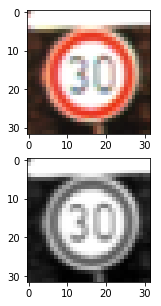

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np

### Grayscale

def grayscale_img(image_data):
    """
    Grayscale the image data with (R+G+B)/3
    :param image_data: The image data to be grayscale
    :return: Grayscaled image data
    """    
    grayscale_image = np.sum(image_data/3, axis=3, keepdims=True)
    #grayscale_image = image_data
    return grayscale_image

# Print Orginal grayscale image
print('Original grayscale image shape:', X_train.shape)

# Print grayscale image
X_train_gr = grayscale_img(X_train) 
X_test_gr = grayscale_img(X_test) 
X_valid_gr = grayscale_img(X_valid)
print('Grayscale shape:', X_train_gr.shape)

# Show orginal image compare with grayscale image
fig, axs = plt.subplots(2, 1, figsize=(5, 5))
axs[0].imshow(X_train[3000])
axs[1].imshow(X_train_gr[3000].squeeze(), cmap='gray')

In [7]:
### Normalize
def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    return a + (image_data - 0)*(b - a) / 255.0

X_train_gr = normalize(X_train_gr) 
X_test_gr = normalize(X_test_gr) 
X_valid_gr = normalize(X_valid_gr) 

Class 0 is having 180 examples.  Augmenting with 1320 samples.
Class 3 is having 1260 examples.  Augmenting with 240 samples.
Class 6 is having 360 examples.  Augmenting with 1140 samples.
Class 7 is having 1290 examples.  Augmenting with 210 samples.
Class 8 is having 1260 examples.  Augmenting with 240 samples.
Class 9 is having 1320 examples.  Augmenting with 180 samples.
Class 11 is having 1170 examples.  Augmenting with 330 samples.
Class 14 is having 690 examples.  Augmenting with 810 samples.
Class 15 is having 540 examples.  Augmenting with 960 samples.
Class 16 is having 360 examples.  Augmenting with 1140 samples.
Class 17 is having 990 examples.  Augmenting with 510 samples.
Class 18 is having 1080 examples.  Augmenting with 420 samples.
Class 19 is having 180 examples.  Augmenting with 1320 samples.
Class 20 is having 300 examples.  Augmenting with 1200 samples.
Class 21 is having 270 examples.  Augmenting with 1230 samples.
Class 22 is having 330 examples.  Augmenting with

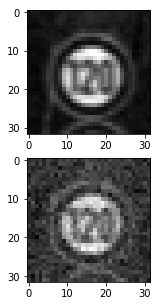

In [8]:
### Augment image with noise image to make per class having 1500 training examples

def add_noise_img(images_data):
    """
    Augment the image data with 
    :param image_data: The image data to be Augmented
    :return: Augmented image data
    """    
    # Set's how much noise we're adding to the images
    noise_factor = 0.01
    
    # Add imge with noise
    noisy_img = images_data + noise_factor * np.random.randn(*images_data.shape)
    noisy_img = np.clip(noisy_img, 0.1, 0.9)
    
    return noisy_img


# Creat list to store the augmented images
traing_examples_per_class = 1500
X_train_augment = []
y_train_augment = []
X_trian_orignal = []

# Add per class 1500 traing images data with random noise samples
for label in range(0, n_classes):    
    class_counts = int(new_label[new_label['ClassId'] == label]['Counts'])
    if (class_counts) < traing_examples_per_class:
        number_augment_img = traing_examples_per_class - class_counts
        select_imgs = X_train_gr[y_train == label]
        print("Class {} is having {} examples.  Augmenting with {} samples.".\
                    format( label, class_counts, number_augment_img ) )
        
        # Add random noise to random selected image for certain class 
        for flag in range(0, number_augment_img):
            img = random.choice(select_imgs)
            noisy_img = add_noise_img(img)
            X_trian_orignal.append(img)
            X_train_augment.append(noisy_img)
            y_train_augment.append(label)

# Show orginal image compare with Augment image
fig, axs = plt.subplots(2, 1, figsize=(5, 5))
axs[0].imshow(X_trian_orignal[3000].squeeze(), cmap='gray')
axs[1].imshow(X_train_augment[3000].squeeze(), cmap='gray')

# Print the Augmented X,y images shape
X_train_augment = np.array(X_train_augment)
y_train_augment = np.array(y_train_augment)
print('Augmented X image shape:',X_train_augment.shape)
print('Augmented y image shape:',y_train_augment.shape)

# Print the processed concatenate traing X, y images shape
X_train_processed = np.concatenate((X_train_gr,X_train_augment))
y_train_processed = np.concatenate((y_train,y_train_augment))
print('Processed X image which use to train shape:',X_train_processed.shape)
print('Processed y image which use to train shape:',y_train_processed.shape)

### Model Architecture
This model referenced to LeNet-5

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Set the EPOCH and BATCH_SIZE values affect the training speed and model accuracy.
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128
rate = 0.001

In [10]:
### Architecture

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)


    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv2')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation and plus dropout.
    fc1 = tf.nn.relu(fc1)
    fc1  = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation adn plus dropout.
    fc2 = tf.nn.relu(fc2)
    #fc2  = tf.nn.dropout(fc2, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [13]:
### Features and Labels

# Inputs
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name="x")
y = tf.placeholder(tf.int32, (None), name="y")
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32,name="keep_prob") 

In [14]:
### Training Pipeline

# Model
logits = LeNet(x)
# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
### Model Evaluation

# Accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_processed, y_train_processed = shuffle(X_train_processed, y_train_processed)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train_processed[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        loss = sess.run(loss_operation, feed_dict={x: batch_x,y: batch_y,keep_prob: 1})        
        training_accuracy = evaluate(X_train_processed, y_train_processed)    
        validation_accuracy = evaluate(X_valid_gr, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print('Loss: {:>10.4f} '.format(loss,))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.846
Validation Accuracy = 0.779
Loss:     0.5572 

EPOCH 2 ...
Training Accuracy = 0.915
Validation Accuracy = 0.858
Loss:     0.3543 

EPOCH 3 ...
Training Accuracy = 0.938
Validation Accuracy = 0.895
Loss:     0.1604 

EPOCH 4 ...
Training Accuracy = 0.949
Validation Accuracy = 0.900
Loss:     0.1403 

EPOCH 5 ...
Training Accuracy = 0.961
Validation Accuracy = 0.914
Loss:     0.4179 

EPOCH 6 ...
Training Accuracy = 0.969
Validation Accuracy = 0.930
Loss:     0.1319 

EPOCH 7 ...
Training Accuracy = 0.967
Validation Accuracy = 0.925
Loss:     0.1280 

EPOCH 8 ...
Training Accuracy = 0.971
Validation Accuracy = 0.924
Loss:     0.0496 

EPOCH 9 ...
Training Accuracy = 0.974
Validation Accuracy = 0.933
Loss:     0.0182 

EPOCH 10 ...
Training Accuracy = 0.978
Validation Accuracy = 0.936
Loss:     0.0486 

EPOCH 11 ...
Training Accuracy = 0.981
Validation Accuracy = 0.941
Loss:     0.0409 

EPOCH 12 ...
Training Accuracy = 0.982
Validation 

### Moified final model ( LeNet-5 improved)
referenced to the [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). 


**When we use the Moified model we'd better to reset the kernel to clean our data and run followly from Pre-process the Data Set (normalization, grayscale, etc.) **

In [8]:
# Remove previous Tensors and Operation

import tensorflow as tf
tf.reset_default_graph()

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Set the EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

EPOCHS = 15
BATCH_SIZE = 128
rate = 0.001

In [10]:
### Architecture

from tensorflow.contrib.layers import flatten

def LeNet_Improved(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x108.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 108), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(108))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation and plus dropout.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # TODO: Pooling. Input = 28x28x108. Output = 14x14x108.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1')

    # TODO: Layer 2: Convolutional. Output = 10x10x200.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,108,200), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(200))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation and plus dropout.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)


    # TODO: Pooling. Input = 10x10x200. Output = 5x5x200.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv2')

    # TODO: Flatten. Input = 5x5x200. Output = 5000.
    fc0 = flatten(conv2)
    
    # TODO: Layer 1: Fully Connected. Input = 5000. Output = 400.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5000, 400), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation and plus dropout.
    fc1 = tf.nn.relu(fc1)
    fc1  = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 2: Fully Connected. Input = 400. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits

In [11]:
### Features and Labels
graph_def = tf.GraphDef()

# Inputs
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name="x")
y = tf.placeholder(tf.int32, (None), name="y")
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32,name="keep_prob") 

In [12]:
### Training Pipeline

# Model
logits = LeNet_Improved(x)
# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
### Model Evaluation

# Accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train, Validate and Test the Model

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_processed, y_train_processed = shuffle(X_train_processed, y_train_processed)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train_processed[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        loss = sess.run(loss_operation, feed_dict={x: batch_x,y: batch_y,keep_prob: 1})        
        training_accuracy = evaluate(X_train_processed, y_train_processed)    
        validation_accuracy = evaluate(X_valid_gr, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print('Loss: {:>10.4f} '.format(loss,))
        print()
        
    saver.save(sess, './lenet2')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.923
Validation Accuracy = 0.817
Loss:     1.1228 

EPOCH 2 ...
Training Accuracy = 0.982
Validation Accuracy = 0.918
Loss:     0.3934 

EPOCH 3 ...
Training Accuracy = 0.992
Validation Accuracy = 0.944
Loss:     0.2436 

EPOCH 4 ...
Training Accuracy = 0.995
Validation Accuracy = 0.934
Loss:     0.0904 

EPOCH 5 ...
Training Accuracy = 0.996
Validation Accuracy = 0.947
Loss:     0.1780 

EPOCH 6 ...
Training Accuracy = 0.998
Validation Accuracy = 0.960
Loss:     0.0539 

EPOCH 7 ...
Training Accuracy = 0.999
Validation Accuracy = 0.951
Loss:     0.0435 

EPOCH 8 ...
Training Accuracy = 0.999
Validation Accuracy = 0.950
Loss:     0.0542 

EPOCH 9 ...
Training Accuracy = 0.999
Validation Accuracy = 0.950
Loss:     0.0256 

EPOCH 10 ...
Training Accuracy = 0.999
Validation Accuracy = 0.963
Loss:     0.0097 

EPOCH 11 ...
Training Accuracy = 0.999
Validation Accuracy = 0.965
Loss:     0.0374 

EPOCH 12 ...
Training Accuracy = 0.999
Validation 

In [16]:
### Test the Model

import tensorflow as tf
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_gr, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.958


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

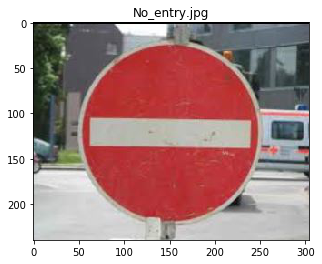

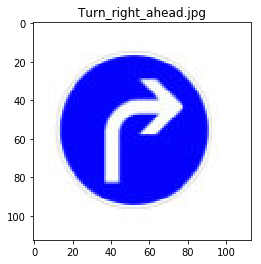

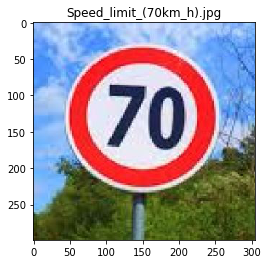

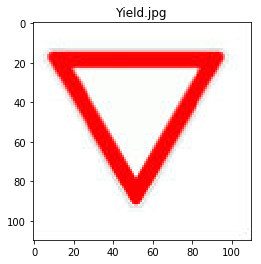

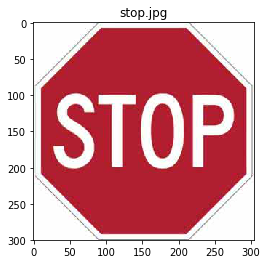

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Import packages
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
%matplotlib inline


X_test_images = []
X_test_images_name = []

for image_name in os.listdir("traffic-signs-test/"):
    # Read and process test images
    img = mpimg.imread("traffic-signs-test/" + image_name)
    img_processed = cv2.resize(img, (32, 32)) # Resize image to 32*32
    #img_processed = cv2.cvtColor(img_processed, cv2.COLOR_BGRA2BGR) # Make sure the image into 3 channels
    img_processed = normalize(img_processed)
    
    # Save the processed image to the list
    X_test_images.append(img_processed)
    X_test_images_name.append(image_name)
      
    #Show these images
    plt.title(image_name)
    #plt.imshow(img_processed)
    plt.imshow(img)
    plt.show()  

# Grayscale the test images
X_test_images = grayscale_img(np.array(X_test_images,dtype=float))

### Predict the Sign Type for Each Image

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    # Predict the test images
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('./lenet2.meta')
    loader.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_img_logits = sess.run(logits, feed_dict={x: X_test_images, keep_prob: 1.0}) 
    prediction = np.argmax(test_img_logits, axis=1)
    
    # Output the original images name and predicted image names
    i = 0
    for pred in prediction:
        print("Original: {0} ---> Prediction: {1}".format(X_test_images_name[i],labels_csv.iloc[pred][1]))
        i += 1

Original: No_entry.jpg ---> Prediction: No entry
Original: Turn_right_ahead.jpg ---> Prediction: Turn right ahead
Original: Speed_limit_(70km_h).jpg ---> Prediction: Speed limit (60km/h)
Original: Yield.jpg ---> Prediction: Yield
Original: stop.jpg ---> Prediction: Stop


### Analyze Performance

In [27]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('./lenet2.meta')
    loader.restore(sess, tf.train.latest_checkpoint('.'))
    
    y_test_images = [17, 33, 4, 13, 14]
    test_accuracy = evaluate(X_test_images, y_test_images)
    print("Test Accuracy = {:.2f}%".format(test_accuracy*100))

Test Accuracy = 80.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

## Checkpoint

### It could run from here after Step1

No_entry.jpg:

No entry: 100.00%
Turn right ahead: 0.00%
Dangerous curve to the right: 0.00%
Go straight or left: 0.00%
No passing: 0.00%
----------------------------------------------------
Turn_right_ahead.jpg:

Turn right ahead: 100.00%
Ahead only: 0.00%
Right-of-way at the next intersection: 0.00%
Roundabout mandatory: 0.00%
Turn left ahead: 0.00%
----------------------------------------------------
Speed_limit_(70km_h).jpg:

Speed limit (60km/h): 55.23%
Bumpy road: 20.05%
Road work: 10.30%
Bicycles crossing: 9.62%
Wild animals crossing: 2.96%
----------------------------------------------------
Yield.jpg:

Yield: 100.00%
Priority road: 0.00%
Go straight or right: 0.00%
Turn left ahead: 0.00%
End of all speed and passing limits: 0.00%
----------------------------------------------------
stop.jpg:

Stop: 96.76%
Speed limit (30km/h): 1.61%
Speed limit (20km/h): 0.45%
Speed limit (60km/h): 0.36%
Yield: 0.20%
----------------------------------------------------


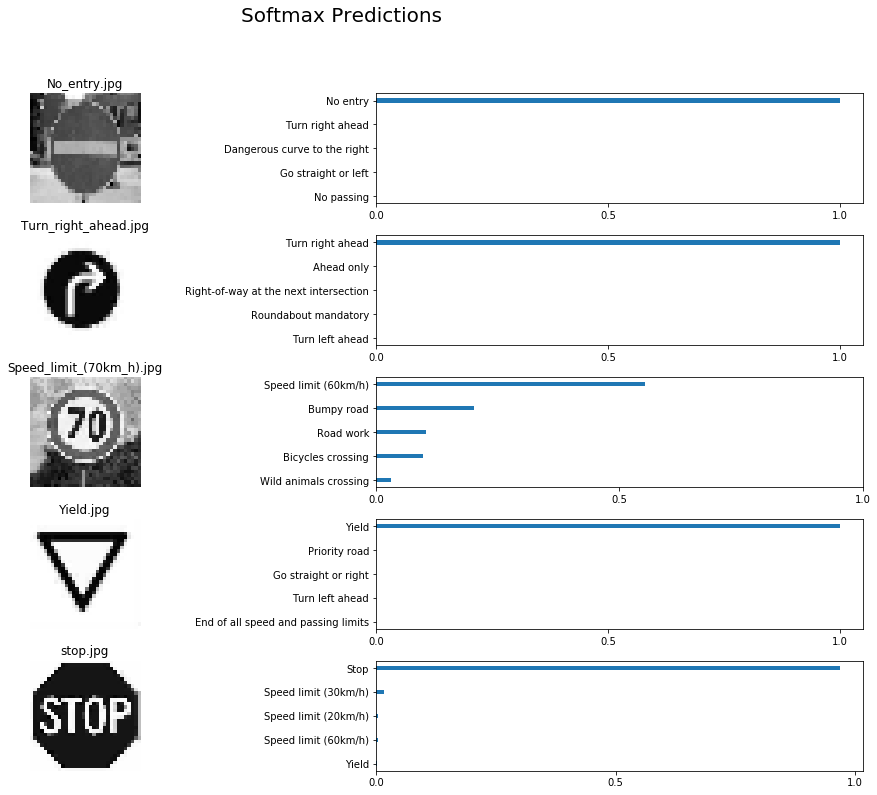

In [28]:
# Import packages
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
%matplotlib inline


save_model_path = './lenet2'

### Grayscale
def grayscale_img(image_data):
    """
    Grayscale the image data with (R+G+B)/3
    :param image_data: The image data to be grayscale
    :return: Grayscaled image data
    """    
    grayscale_image = np.sum(image_data/3, axis=3, keepdims=True)
    return grayscale_image
    

# Normalize the image data
def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for image data
    a = 0.1
    b = 0.9
    return a + (image_data - 0)*(b - a) / 255.0


def test_Softmax_Probabilities():
    """
    Test the saved model against the test dataset
    """
    # Load test images
    X_test_images = []
    X_test_images_name = []

    for image_name in os.listdir("traffic-signs-test/"):
        # Read and process test images
        img = mpimg.imread("traffic-signs-test/" + image_name)
        img_processed = cv2.resize(img, (32, 32)) # Resize image to 32*32    
        img_processed = normalize(img_processed)
    
        # Save the processed image to the list
        X_test_images.append(img_processed)
        X_test_images_name.append(image_name)
    
    X_test_images = grayscale_img(np.array(X_test_images,dtype=float))
    loaded_graph = tf.Graph()     
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        #loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        #loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get top5 softmax probabilities
        test_img_logits = sess.run(loaded_logits, feed_dict={loaded_x: X_test_images, loaded_keep_prob: 1.0})
        softmax = tf.nn.softmax(test_img_logits)
        top5 = sess.run(tf.nn.top_k(softmax, k=5))
        
        # Show softmax probabilities by figures
        fig, axies = plt.subplots(nrows=5, ncols=2, figsize=(15,10))
        fig.tight_layout()
        fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)
        n_predictions = 5
        margin = 0.05
        ind = np.arange(n_predictions)
        width = (1. - 2. * margin) / n_predictions
        
        for x,pred_values in zip(range(len(X_test_images_name)), top5.values):
            print("{0}:".format(X_test_images_name[x]))
            print()
            pred_names = []
            for y in range(5):
                print("{:s}: {:.2f}%".format(labels_csv.iloc[top5[1][x][y]][1], top5[0][x][y]*100)) 
                pred_names.append(labels_csv.iloc[top5[1][x][y]][1])
                
            correct_name = X_test_images_name[x]
                
            axies[x][0].imshow(X_test_images[x].squeeze(), cmap='gray')
            axies[x][0].set_title(correct_name)
            axies[x][0].set_axis_off()

            axies[x][1].barh(ind + margin, pred_values[::-1], width)
            axies[x][1].set_yticks(ind + margin)
            axies[x][1].set_yticklabels(pred_names[::-1])
            axies[x][1].set_xticks([0, 0.5, 1.0])
            print("----------------------------------------------------")         
            
test_Softmax_Probabilities()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [11]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

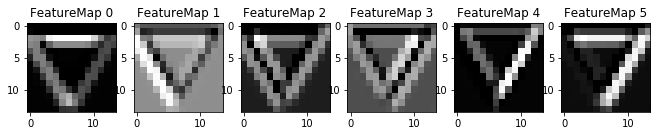

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv1 = sess.graph.get_tensor_by_name('conv1:0')
    outputFeatureMap([X_test_images[3]],conv1, activation_min=-1, activation_max=-1, plt_num=1)

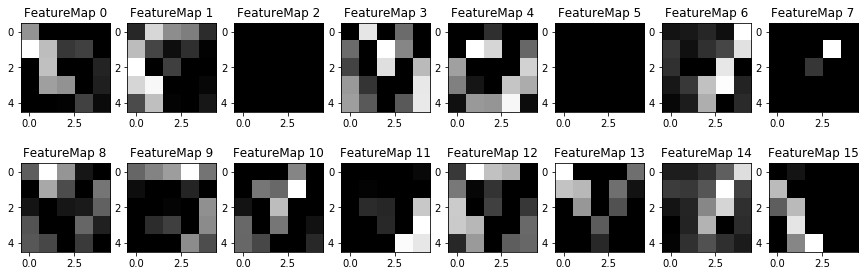

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv2 = sess.graph.get_tensor_by_name('conv2:0')
    outputFeatureMap([X_test_images[3]],conv2, activation_min=-1, activation_max=-1, plt_num=1)   